# | HW2(~1/13) | Inception Network 구현

[Inception network](https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Szegedy_Going_Deeper_With_2015_CVPR_paper.pdf)는 Inception module 여러개로 구성된 모델이다. 다음 그림을 참고하여 Inception network를 구현하시오.

- **채점 기준**
  - Inception module을 잘 구현해야 한다.
  - 아래의 표에 있는 대로 architecture를 구현해야 한다. (논문과 약간 다르게 auxiliary classifier 등이 생략되어 있다)
  - 아래의 **표에 있는 대로 hyperparameter(filter size, stride, filter 수)를 설정**해야 하고, 각 layer 및 module의 **output size가 표와 같게 나와야 한다.**
  - test accuracy가 **65% 이상** 나와야 한다.
- **제출**
  - "HW2_학번_이름.ipynb" 형태로 저장하여 Jupyter Notebook을 그대로 제출.
    - 예: HW2_2022_12345_keondo.ipynb
  - output 지우지 말아 주세요

## 과제 설명

### Inception Module

- `strides`는 모두 1로 설정해야 output size가 맞게 나올 것이다.



<img src="https://user-images.githubusercontent.com/37704174/108797724-369ef800-75cf-11eb-987a-926657daf61e.JPG" width="400" height="400"/>  



### Inception Network Architecture
- 아래의 표에 있는대로 구성을 하면 이러한 구조의 모델이 만들어진다.

<img src="https://user-images.githubusercontent.com/37704174/108797713-2dae2680-75cf-11eb-8593-5a1bf50549da.png" width="400" height="400"/>  

### Specification


<img src="https://user-images.githubusercontent.com/37704174/109782740-8d9a7200-7c4c-11eb-9999-d859b67dc468.JPG" width="600" height="600"/>  

- 이 표에 있는 대로 위에서부터 layer 및 Inception module을 쌓아야 한다.
- 모든 `Conv2D`와 `MaxPool2D`의 padding 옵션은 `same`으로 설정해야 output size가 올바르게 나올 것이다.
- 표 3행을 보면 convolution의 depth가 2이다. 이것은 `Conv2D` layer가 2개 있다는 뜻이고, 각각의 filter의 수는 64, 192로 설정해야 한다.
- Inception module의 hyperparameter 설명
  - #1x1: 맨 왼쪽 1x1 convolution layer의 filter 수
  - #3x3 reduce: 3x3 convolution layer 이전에 나오는 1x1 convolution layer의 filter 수
  - #3x3: 3x3 convolution layer의 filter 수
  - #5x5 reduce: 5x5 convolution layer 이전에 나오는 1x1 convolution layer의 filter 수
  - #5x5: 5x5 convolution layer의 filter 수
  - pool proj: max pooling 다음에 나오는 1x1 convolution layer의 filter 수

## (Optional) Colab Setup

In [1]:
# Colab에 Google Drive를 마운트하면 노트북의 모든 코드가 Google Drive의 모든 파일에 액세스할 수 있게 됨
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
"""
Change directory to where this file is located
"""
%cd '/content/drive/MyDrive/Colab Notebooks/Ambient AI'

/content/drive/MyDrive/Colab Notebooks/Ambient AI


## Import Modules

In [3]:
import tensorflow as tf
### 자유롭게 import
import math
import os
cifar10 = tf.keras.datasets.cifar10

## GPU Setting

In [4]:
"""
Make sure your runtime type is GPU!
"""
physical_devices = tf.config.list_physical_devices('GPU')
print('Num_GPUs:{}, List:{}'.format(len(physical_devices), physical_devices))

Num_GPUs:1, List:[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 1. Implement Inception Network


### Inception Module

In [5]:
def InceptionModule(inputs, f_1x1, f_3x3_r, f_3x3, f_5x5_r, f_5x5, f_pool):
    """
    inputs: input of Inception module
    f_ : number of filters in the table above

    """
    ### Q1. Make a Inception Module (as Figure 2) ###
    x_1 = tf.keras.layers.Conv2D(filters=f_1x1, kernel_size=(1,1), strides=1, padding='same', activation='relu')(inputs)
    x_2_1 = tf.keras.layers.Conv2D(filters=f_3x3_r, kernel_size=(1,1), strides=(1,1), padding='same', activation='relu')(inputs)
    x_3_1 = tf.keras.layers.Conv2D(filters=f_5x5_r, kernel_size=(1,1), strides=(1,1), padding='same', activation='relu')(inputs)
    x_4_1 = tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(1,1), padding='same')(inputs)

    x_2_2 = tf.keras.layers.Conv2D(filters=f_3x3, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x_2_1)
    x_3_2 = tf.keras.layers.Conv2D(filters=f_5x5, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu')(x_3_1)
    x_4_2 = tf.keras.layers.Conv2D(filters=f_pool, kernel_size=(1,1), strides=(1,1), padding='same', activation='relu')(x_4_1)

    outputs = tf.keras.layers.Concatenate(axis=-1)([x_1, x_2_2, x_3_2, x_4_2])
    # use tf.keras.layers.concatenate

    #######################################
    return outputs

### Inception Network

In [6]:
def InceptionNet():
    inputs = tf.keras.layers.Input(shape=(32, 32, 3))

    ### Q2. Make a Inception Network according to the above specification ###
    x = tf.keras.layers.Conv2D(filters=64, kernel_size=(7,7), strides=(1,1), padding='same', activation='relu')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
    x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2D(filters=192, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=2, padding='same')(x)
    x = InceptionModule(x, 64, 96, 128, 16, 32, 32)
    x = InceptionModule(x, 128, 128, 192, 32, 96, 64)
    x = tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
    x = InceptionModule(x, 192, 96, 208, 16, 48, 64)
    x = InceptionModule(x, 160, 112, 224, 24, 64, 64)
    x = InceptionModule(x, 128, 128, 256, 24, 64, 64)
    x = InceptionModule(x, 112, 144, 288, 32, 64, 64)
    x = InceptionModule(x, 256, 160, 320, 32, 128, 128)
    x = tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
    x = InceptionModule(x, 256, 160, 320, 32, 128, 128)
    x = InceptionModule(x, 384, 192, 384, 48, 128, 128)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(10, activation='linear')(x)

    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

    #########################################################################

    return tf.keras.Model(inputs=inputs, outputs=outputs)

In [7]:
my_inception = InceptionNet()

### Model Summary

아래 셀을 실행 했을 때, 표의 각각에 해당하는 output size가 맞게 나와야 한다.

In [8]:
my_inception.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 64)   9472        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 16, 16, 64)   0           ['batch_normalization[0][0]']

## 2. Dataset

### Training Data

아래의 데이터를 이용한다.

In [9]:
### DO NOT MODIFY ###

#Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Split train set into train/valid set
from sklearn import model_selection
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train,test_size=0.1)

170498071/170498071 [==============================] - 2s 0us/step


### Data Preprocessing

원하는 대로 데이터를 전처리 해주면 된다.

In [10]:
## Q3. Data preprocessing (ex. normalize...) ##
x_train = x_train / 255.0
x_valid = x_valid / 255.0
x_test = x_test / 255.0
###############################################

## 3. Training

### Model Compile

Optimizer, Loss function을 알맞게 설정한다. <br>
Callbacks도 자유롭게 사용한다.

In [11]:
## Q4. Model compile ##
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optim_fn = tf.keras.optimizers.Adam(learning_rate=0.001)

my_inception.compile(optimizer=optim_fn,
                     loss=loss_fn,
                     metrics=['accuracy'])

checkpoint_dir = './Training_Checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

def exp_decay(epoch):
    ####### 실습 #######
    if epoch < 3:
        return 0.001
    else:
        return 0.001 * math.exp(0.1 * (3-epoch))

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix, save_weights_only = True),
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3),
    tf.keras.callbacks.LearningRateScheduler(exp_decay)
]
#######################

### Model Training

hyperparameter를 적절히 설정한다. (epochs 등..)

In [12]:
## Q5. Set hyperparameters & training ##
hist = my_inception.fit(x=x_train,
                        y=y_train,
                        validation_data=(x_valid, y_valid),
                        # your hyperparameters...
                        epochs=20, callbacks=callbacks
                        )
########################################

Epoch 1/20
1407/1407 [==============================] - 79s 31ms/step - loss: 1.9783 - accuracy: 0.2241 - val_loss: 1.8504 - val_accuracy: 0.2796 - lr: 0.0010
Epoch 2/20
1407/1407 [==============================] - 40s 28ms/step - loss: 1.5879 - accuracy: 0.4039 - val_loss: 1.4695 - val_accuracy: 0.4550 - lr: 0.0010
Epoch 3/20
1407/1407 [==============================] - 40s 28ms/step - loss: 1.3413 - accuracy: 0.5129 - val_loss: 1.5043 - val_accuracy: 0.4534 - lr: 0.0010
Epoch 4/20
1407/1407 [==============================] - 40s 28ms/step - loss: 1.1702 - accuracy: 0.5780 - val_loss: 1.0965 - val_accuracy: 0.6088 - lr: 0.0010
Epoch 5/20
1407/1407 [==============================] - 40s 28ms/step - loss: 1.0332 - accuracy: 0.6330 - val_loss: 1.1819 - val_accuracy: 0.5762 - lr: 9.0484e-04
Epoch 6/20
1407/1407 [==============================] - 40s 29ms/step - loss: 0.9245 - accuracy: 0.6743 - val_loss: 1.0132 - val_accuracy: 0.6456 - lr: 8.1873e-04
Epoch 7/20
1407/1407 [================

## 참고 >

조교가 학습한 모델의 validation accuracy를 그래프로 나타내 보았다.

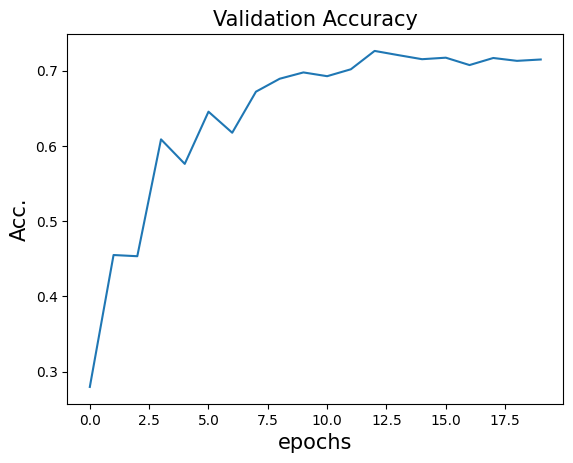

In [13]:
import matplotlib.pyplot as plt

plt.plot(hist.history['val_accuracy'])
plt.title('Validation Accuracy', fontsize=15)
plt.xlabel('epochs', fontsize=15)
plt.ylabel('Acc.', fontsize=15)

plt.show()

## Test Accuracy

Test accuracy 측정 결과 **65% 이상**이 나와야 한다.

In [14]:
### DO NOT MODIFY ###
my_inception.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.7832 - accuracy: 0.7046


[1.7831732034683228, 0.7045999765396118]